In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from prophet.diagnostics import cross_validation


In [2]:
# read csv file
df = pd.read_csv('../Dataset/WHO-COVID-19-germany-usa-india-data.csv')
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
0,1/3/2020,DE,Germany,EURO,0,0
1,1/4/2020,DE,Germany,EURO,1,1
2,1/5/2020,DE,Germany,EURO,0,1
3,1/6/2020,DE,Germany,EURO,0,1
4,1/7/2020,DE,Germany,EURO,0,1


# Data Processing

In [3]:
#  count NAN values
count_nan = df.isna().sum()
print(count_nan)

Date_reported       0
Country_code        0
Country             0
WHO_region          0
New_cases           0
Cumulative_cases    0
dtype: int64


In [4]:
# calculate duplicates
dups = df.duplicated()
# report if there any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Date_reported, Country_code, Country, WHO_region, New_cases, Cumulative_cases]
Index: []


In [5]:
#check data types
df.dtypes

Date_reported       object
Country_code        object
Country             object
WHO_region          object
New_cases            int64
Cumulative_cases     int64
dtype: object

In [6]:
# change timestamp data types string to datetime
df['Date_reported'] = pd. to_datetime(df['Date_reported'], format = '%m/%d/%Y')

In [7]:
df.dtypes

Date_reported       datetime64[ns]
Country_code                object
Country                     object
WHO_region                  object
New_cases                    int64
Cumulative_cases             int64
dtype: object

In [8]:
# Get the unique values of the 'Country' column
countries = df['Country'].unique()
print(countries)

['Germany' 'India' 'United States of America']


In [9]:
# Filter the dataframe to only include rows where the 'Country' column is 'Germany'
df_germany = df[df['Country'] == 'Germany']
df_germany.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
0,2020-01-03,DE,Germany,EURO,0,0
1,2020-01-04,DE,Germany,EURO,1,1
2,2020-01-05,DE,Germany,EURO,0,1
3,2020-01-06,DE,Germany,EURO,0,1
4,2020-01-07,DE,Germany,EURO,0,1


In [10]:
# Filter the dataframe to only include rows where the 'Country' column is 'India'
df_india = df[df['Country']== 'India']
df_india.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
1063,2020-01-03,IN,India,SEARO,0,0
1064,2020-01-04,IN,India,SEARO,0,0
1065,2020-01-05,IN,India,SEARO,0,0
1066,2020-01-06,IN,India,SEARO,0,0
1067,2020-01-07,IN,India,SEARO,0,0


In [11]:
# Filter the dataframe to only include rows where the 'Country' column is 'United States of America'
df_usa = df[df['Country']== 'United States of America']
df_usa.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
2126,2020-01-03,US,United States of America,AMRO,0,0
2127,2020-01-04,US,United States of America,AMRO,0,0
2128,2020-01-05,US,United States of America,AMRO,0,0
2129,2020-01-06,US,United States of America,AMRO,0,0
2130,2020-01-07,US,United States of America,AMRO,0,0


# Data Analysis and Visualization

In [12]:
# Get information about the df_germany,including the number of rows and columns, data types, and memory usage
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_reported     1063 non-null   datetime64[ns]
 1   Country_code      1063 non-null   object        
 2   Country           1063 non-null   object        
 3   WHO_region        1063 non-null   object        
 4   New_cases         1063 non-null   int64         
 5   Cumulative_cases  1063 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.1+ KB


In [13]:
# Get information about the df_ndia, including the number of rows and columns, data types, and memory usage
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 1063 to 2125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_reported     1063 non-null   datetime64[ns]
 1   Country_code      1063 non-null   object        
 2   Country           1063 non-null   object        
 3   WHO_region        1063 non-null   object        
 4   New_cases         1063 non-null   int64         
 5   Cumulative_cases  1063 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.1+ KB


In [14]:
# Get information about the df_usa, including the number of rows and columns, data types, and memory usage
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 2126 to 3188
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_reported     1063 non-null   datetime64[ns]
 1   Country_code      1063 non-null   object        
 2   Country           1063 non-null   object        
 3   WHO_region        1063 non-null   object        
 4   New_cases         1063 non-null   int64         
 5   Cumulative_cases  1063 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.1+ KB


In [15]:
# Plot the 'Cumulative_cases' column against the 'Date_reported' column for the df_germany
# fig,ax = plt.subplots(figsize = (8,5))
# df_germany.plot('Date_reported','Cumulative_cases', ax= ax)
# ax.set(title = "Cumulative cases over time in Germany")

In [16]:
# Plot the 'Cumulative_cases' column against the 'Date_reported' column for the df_india
# fig,ax = plt.subplots(figsize = (8,5))
# df_india.plot('Date_reported','Cumulative_cases', ax= ax)
# ax.set(title = "Cumulative cases over time in India")

In [17]:
# Plot the 'Cumulative_cases' column against the 'Date_reported' column for the df_usa
# fig,ax = plt.subplots(figsize = (8,5))
# df_usa.plot('Date_reported','Cumulative_cases', ax= ax)
# ax.set(title = "Cumulative cases over time in USA")

## Cumulative cases prediction in Germany

In [18]:
# print the dataframe
df_germany

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
0,2020-01-03,DE,Germany,EURO,0,0
1,2020-01-04,DE,Germany,EURO,1,1
2,2020-01-05,DE,Germany,EURO,0,1
3,2020-01-06,DE,Germany,EURO,0,1
4,2020-01-07,DE,Germany,EURO,0,1
...,...,...,...,...,...,...
1058,2022-11-26,DE,Germany,EURO,25820,36384382
1059,2022-11-27,DE,Germany,EURO,6237,36390619
1060,2022-11-28,DE,Germany,EURO,3494,36394113
1061,2022-11-29,DE,Germany,EURO,37671,36431784


In [19]:
# Split the data into train and test sets
train_data = df_germany[:int(len(df_germany) * 0.8)]
test_data = df_germany[int(len(df_germany) * 0.8):]


In [20]:
# Get the shape of train_data and test_data
train_data.shape ,test_data.shape

((850, 6), (213, 6))

# Model Building

In [21]:
# Rename the columns of the 'train_data' dataframe for use in the Prophet model
train_df = train_data.rename(columns={'Date_reported': 'ds', 'Cumulative_cases': 'y'})
train_df


,ds,Country_code,Country,WHO_region,New_cases,y
0,2020-01-03,DE,Germany,EURO,0,0
1,2020-01-04,DE,Germany,EURO,1,1
2,2020-01-05,DE,Germany,EURO,0,1
3,2020-01-06,DE,Germany,EURO,0,1
4,2020-01-07,DE,Germany,EURO,0,1
...,...,...,...,...,...,...
845,2022-04-27,DE,Germany,EURO,139534,24612011
846,2022-04-28,DE,Germany,EURO,115772,24727783
847,2022-04-29,DE,Germany,EURO,94793,24822576
848,2022-04-30,DE,Germany,EURO,78380,24900956


In [22]:
%%time
# define the model
model = Prophet()
# fit the model
model.fit(train_df)

15:06:04 - cmdstanpy - INFO - Chain [1] start processing
15:06:05 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 407 ms, sys: 48.7 ms, total: 456 ms
Wall time: 1.36 s


In [23]:
# Rename the columns of the 'test_data' dataframe for use in the Prophet model
test_df = test_data.rename(columns={'Date_reported': 'ds', 'Cumulative_cases': 'y'})


In [24]:
# Use the trained Prophet model to make predictions for the test_df
predictions = model.predict(test_df)

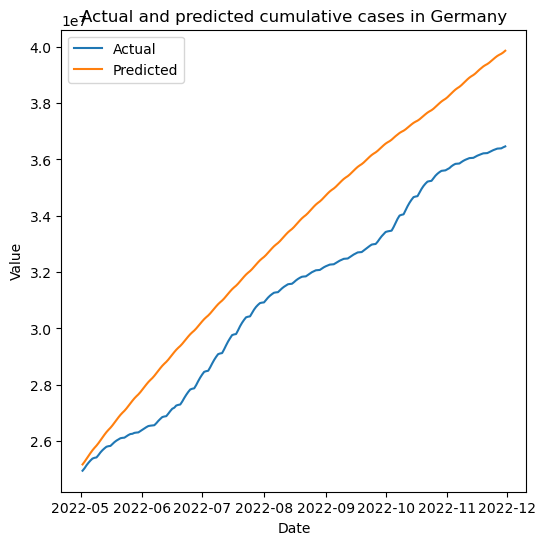

In [25]:
# Create a plot to visualize the actual and predicted cumulative cases
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(predictions['ds'], predictions['yhat'], label='Predicted')
ax.set(title = "Actual and predicted cumulative cases in Germany")
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()
plt.show()

In [26]:
df_cv = cross_validation(model, horizon='30 days')


  0%|          | 0/31 [00:00<?, ?it/s]

15:06:06 - cmdstanpy - INFO - Chain [1] start processing
15:06:06 - cmdstanpy - INFO - Chain [1] done processing
15:06:07 - cmdstanpy - INFO - Chain [1] start processing
15:06:07 - cmdstanpy - INFO - Chain [1] done processing
15:06:07 - cmdstanpy - INFO - Chain [1] start processing
15:06:08 - cmdstanpy - INFO - Chain [1] done processing
15:06:09 - cmdstanpy - INFO - Chain [1] start processing
15:06:09 - cmdstanpy - INFO - Chain [1] done processing
15:06:10 - cmdstanpy - INFO - Chain [1] start processing
15:06:10 - cmdstanpy - INFO - Chain [1] done processing
15:06:11 - cmdstanpy - INFO - Chain [1] start processing
15:06:11 - cmdstanpy - INFO - Chain [1] done processing
15:06:12 - cmdstanpy - INFO - Chain [1] start processing
15:06:13 - cmdstanpy - INFO - Chain [1] done processing
15:06:13 - cmdstanpy - INFO - Chain [1] start processing
15:06:13 - cmdstanpy - INFO - Chain [1] done processing
15:06:14 - cmdstanpy - INFO - Chain [1] start processing
15:06:14 - cmdstanpy - INFO - Chain [1]

In [27]:
r2 = round(r2_score(df_cv['y'], df_cv['yhat']),3)
r2

0.986

In [28]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])),3)
print(f'RMSE: {rmse}')

RMSE: 677423.501


In [29]:
# Calculate the MAE
mae = round(mean_absolute_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAE: {mae}')

MAE: 298093.643


In [30]:
# Calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAPE: {mape}')

MAPE: 3.176


## Forecast

In [31]:
# Calculate the last day of the test data
last_day_of_test = test_df['ds'].iloc[-1]

# Calculate the dates for the forecast
future_dates = pd.date_range(start=last_day_of_test, periods=31, freq='D')

# Create a DataFrame for the forecast dates
forecast_dates = pd.DataFrame({'ds': future_dates})

# Predict the future values
forecast = model.predict(forecast_dates)
print(forecast.head())

          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2022-11-30  4.208232e+07  3.976875e+07  3.995544e+07  4.208232e+07   
1 2022-12-01  4.217539e+07  3.982459e+07  4.001155e+07  4.217539e+07   
2 2022-12-02  4.226847e+07  3.988653e+07  4.006599e+07  4.226847e+07   
3 2022-12-03  4.236155e+07  3.992726e+07  4.012355e+07  4.236155e+07   
4 2022-12-04  4.245462e+07  3.996735e+07  4.017383e+07  4.245462e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  4.208232e+07   -2.222940e+06         -2.222940e+06         -2.222940e+06   
1  4.217539e+07   -2.255351e+06         -2.255351e+06         -2.255351e+06   
2  4.226847e+07   -2.293290e+06         -2.293290e+06         -2.293290e+06   
3  4.236155e+07   -2.333867e+06         -2.333867e+06         -2.333867e+06   
4  4.245462e+07   -2.386020e+06         -2.386020e+06         -2.386020e+06   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0  -4997.630465  

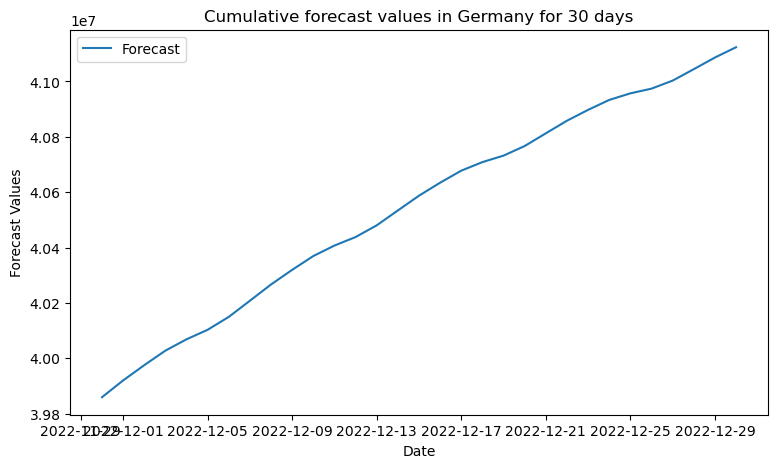

In [32]:
# Create a plot to visualize the forecast values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(forecast_dates['ds'], forecast['yhat'], label='Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("Forecast Values")
ax.set(title = "Cumulative forecast values in Germany for 30 days")
ax.legend()
plt.show()

## Cumulative cases prediction in India

In [33]:
df_india

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
1063,2020-01-03,IN,India,SEARO,0,0
1064,2020-01-04,IN,India,SEARO,0,0
1065,2020-01-05,IN,India,SEARO,0,0
1066,2020-01-06,IN,India,SEARO,0,0
1067,2020-01-07,IN,India,SEARO,0,0
...,...,...,...,...,...,...
2121,2022-11-26,IN,India,SEARO,389,44671219
2122,2022-11-27,IN,India,SEARO,343,44671562
2123,2022-11-28,IN,India,SEARO,291,44671853
2124,2022-11-29,IN,India,SEARO,215,44672068


In [34]:
# Split the data into train and test sets
train_data = df_india[:int(len(df_india) * 0.8)]
test_data = df_india[int(len(df_india) * 0.8):]


In [35]:
# Get the shape of train_data and test_data
train_data.shape, test_data.shape

((850, 6), (213, 6))

## Model Building

In [36]:
# Rename the columns of the 'train_data' dataframe for use in the Prophet model
train_df = train_data.rename(columns={'Date_reported': 'ds', 'Cumulative_cases': 'y'})
train_df


,ds,Country_code,Country,WHO_region,New_cases,y
1063,2020-01-03,IN,India,SEARO,0,0
1064,2020-01-04,IN,India,SEARO,0,0
1065,2020-01-05,IN,India,SEARO,0,0
1066,2020-01-06,IN,India,SEARO,0,0
1067,2020-01-07,IN,India,SEARO,0,0
...,...,...,...,...,...,...
1908,2022-04-27,IN,India,SEARO,2927,43065496
1909,2022-04-28,IN,India,SEARO,3303,43068799
1910,2022-04-29,IN,India,SEARO,3377,43072176
1911,2022-04-30,IN,India,SEARO,3688,43075864


In [37]:
%%time
# define the model
model = Prophet(seasonality_prior_scale=0.02)

# model = Prophet(seasonality_mode='additive')
# fit the model
model.fit(train_df)

15:06:45 - cmdstanpy - INFO - Chain [1] start processing
15:06:47 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 112 ms, sys: 11.8 ms, total: 123 ms
Wall time: 1.53 s


In [38]:
# Rename the columns of the 'test_data' dataframe for use in the Prophet model
test_df = test_data.rename(columns={'Date_reported': 'ds', 'Cumulative_cases': 'y'})

In [39]:
#Use the trained Prophet model to make predictions for the test_df
predictions = model.predict(test_df)

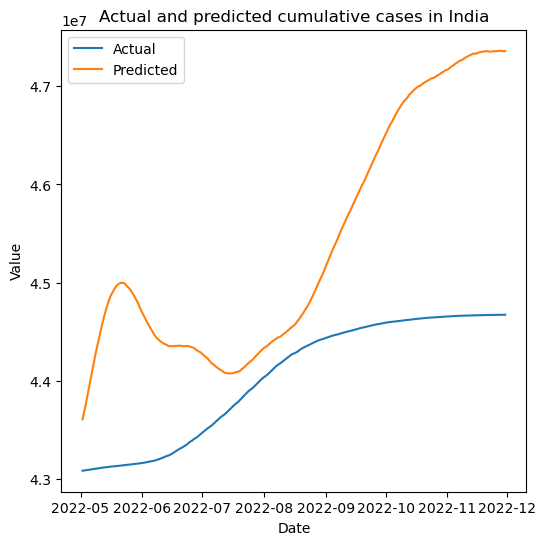

In [40]:
# Create a plot to visualize the actual and predicted values
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(predictions['ds'], predictions['yhat'], label='Predicted')
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set(title = "Actual and predicted cumulative cases in India")
ax.legend()
plt.show()

In [41]:
df_cv = cross_validation(model, horizon='30 days')

  0%|          | 0/31 [00:00<?, ?it/s]

15:06:47 - cmdstanpy - INFO - Chain [1] start processing
15:06:48 - cmdstanpy - INFO - Chain [1] done processing
15:06:48 - cmdstanpy - INFO - Chain [1] start processing
15:06:48 - cmdstanpy - INFO - Chain [1] done processing
15:06:49 - cmdstanpy - INFO - Chain [1] start processing
15:06:49 - cmdstanpy - INFO - Chain [1] done processing
15:06:49 - cmdstanpy - INFO - Chain [1] start processing
15:06:50 - cmdstanpy - INFO - Chain [1] done processing
15:06:50 - cmdstanpy - INFO - Chain [1] start processing
15:06:51 - cmdstanpy - INFO - Chain [1] done processing
15:06:51 - cmdstanpy - INFO - Chain [1] start processing
15:06:51 - cmdstanpy - INFO - Chain [1] done processing
15:06:52 - cmdstanpy - INFO - Chain [1] start processing
15:06:52 - cmdstanpy - INFO - Chain [1] done processing
15:06:53 - cmdstanpy - INFO - Chain [1] start processing
15:06:53 - cmdstanpy - INFO - Chain [1] done processing
15:06:54 - cmdstanpy - INFO - Chain [1] start processing
15:06:54 - cmdstanpy - INFO - Chain [1]

In [42]:
# calculate the R2
r2 = round(r2_score(df_cv['y'], df_cv['yhat']),3)
r2

0.98

In [43]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])),3)
print(f'RMSE: {rmse}')

RMSE: 1512313.083


In [44]:
# Calculate the MAE
mae = round(mean_absolute_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAE: {mae}')

MAE: 863342.48


In [45]:
# Calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(df_cv['y'], df_cv['yhat']),3)
print(f'MAPE: {mape}')

MAPE: 2.921


## Forecast

In [46]:
# Calculate the last day of the test data
last_day_of_test = test_df['ds'].iloc[-1]

# Calculate the dates for the forecast
future_dates = pd.date_range(start=last_day_of_test, periods=31, freq='D')

# Create a DataFrame for the forecast dates
forecast_dates = pd.DataFrame({'ds': future_dates})

# Predict the future values
forecast = model.predict(forecast_dates)
print(forecast.head())

          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2022-11-30  4.961599e+07  4.714311e+07  4.758657e+07  4.961599e+07   
1 2022-12-01  4.965126e+07  4.714259e+07  4.757775e+07  4.965126e+07   
2 2022-12-02  4.968653e+07  4.713344e+07  4.758542e+07  4.968653e+07   
3 2022-12-03  4.972180e+07  4.713919e+07  4.761585e+07  4.972180e+07   
4 2022-12-04  4.975707e+07  4.712953e+07  4.760428e+07  4.975707e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  4.961599e+07   -2.256701e+06         -2.256701e+06         -2.256701e+06   
1  4.965126e+07   -2.285170e+06         -2.285170e+06         -2.285170e+06   
2  4.968653e+07   -2.317986e+06         -2.317986e+06         -2.317986e+06   
3  4.972180e+07   -2.347658e+06         -2.347658e+06         -2.347658e+06   
4  4.975707e+07   -2.379267e+06         -2.379267e+06         -2.379267e+06   

        weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0 -3808.067260  -3

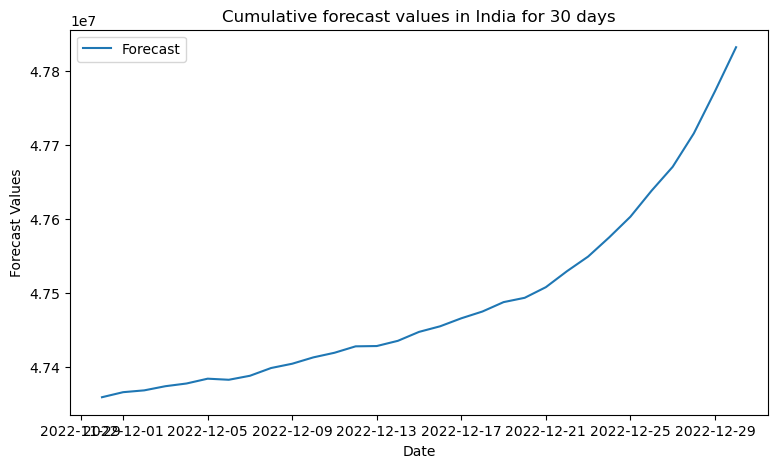

In [47]:
# Create a plot to visualize the forecast values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(forecast_dates['ds'], forecast['yhat'], label='Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("Forecast Values")
ax.set(title = "Cumulative forecast values in India for 30 days")

ax.legend()
plt.show()

# Cumulative cases prediction in USA

In [48]:
df_usa

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases
2126,2020-01-03,US,United States of America,AMRO,0,0
2127,2020-01-04,US,United States of America,AMRO,0,0
2128,2020-01-05,US,United States of America,AMRO,0,0
2129,2020-01-06,US,United States of America,AMRO,0,0
2130,2020-01-07,US,United States of America,AMRO,0,0
...,...,...,...,...,...,...
3184,2022-11-26,US,United States of America,AMRO,0,97329491
3185,2022-11-27,US,United States of America,AMRO,0,97329491
3186,2022-11-28,US,United States of America,AMRO,0,97329491
3187,2022-11-29,US,United States of America,AMRO,0,97329491


In [49]:
# Split the data into train and test sets
train_data = df_usa[:int(len(df_usa) * 0.8)]
test_data = df_usa[int(len(df_usa) * 0.8):]


In [50]:
# Get the shape of train_data and test_data
train_data.shape ,test_data.shape

((850, 6), (213, 6))

## Model Building

In [51]:
# Rename the columns of the 'train_data' dataframe for use in the Prophet model
train_df = train_data.rename(columns={'Date_reported': 'ds', 'Cumulative_cases': 'y'})
train_df


,ds,Country_code,Country,WHO_region,New_cases,y
2126,2020-01-03,US,United States of America,AMRO,0,0
2127,2020-01-04,US,United States of America,AMRO,0,0
2128,2020-01-05,US,United States of America,AMRO,0,0
2129,2020-01-06,US,United States of America,AMRO,0,0
2130,2020-01-07,US,United States of America,AMRO,0,0
...,...,...,...,...,...,...
2971,2022-04-27,US,United States of America,AMRO,49858,80341913
2972,2022-04-28,US,United States of America,AMRO,64414,80406327
2973,2022-04-29,US,United States of America,AMRO,77145,80483472
2974,2022-04-30,US,United States of America,AMRO,61915,80545387


In [52]:
%%time
# define the model
model = Prophet()
# fit the model
model.fit(train_df)

15:07:25 - cmdstanpy - INFO - Chain [1] start processing
15:07:26 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 112 ms, sys: 12.4 ms, total: 124 ms
Wall time: 1.27 s


In [53]:
# Rename the columns of the 'test_data' dataframe for use in the Prophet model
test_df = test_data.rename(columns={'Date_reported': 'ds', 'Cumulative_cases': 'y'})


In [54]:
# Use the trained Prophet model to make predictions for the test_df
predictions = model.predict(test_df)

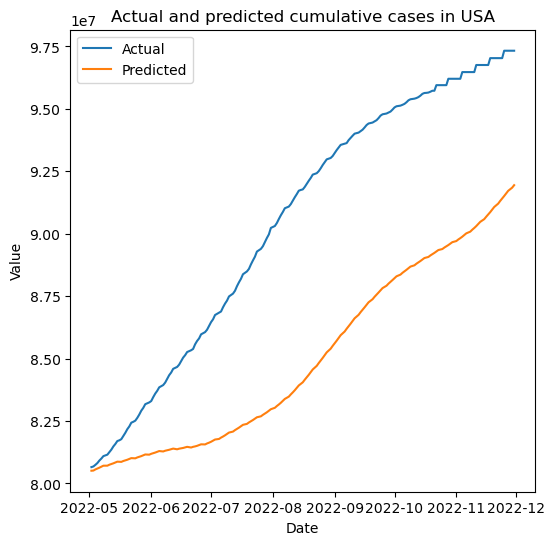

In [55]:
# Create a plot to visualize the actual and predicted values
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(predictions['ds'], predictions['yhat'], label='Predicted')
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set(title = "Actual and predicted cumulative cases in USA")
ax.legend()
plt.show()

In [56]:
df_cv = cross_validation(model, horizon='30 days')

  0%|          | 0/31 [00:00<?, ?it/s]

15:07:27 - cmdstanpy - INFO - Chain [1] start processing
15:07:27 - cmdstanpy - INFO - Chain [1] done processing
15:07:28 - cmdstanpy - INFO - Chain [1] start processing
15:07:28 - cmdstanpy - INFO - Chain [1] done processing
15:07:28 - cmdstanpy - INFO - Chain [1] start processing
15:07:29 - cmdstanpy - INFO - Chain [1] done processing
15:07:29 - cmdstanpy - INFO - Chain [1] start processing
15:07:30 - cmdstanpy - INFO - Chain [1] done processing
15:07:30 - cmdstanpy - INFO - Chain [1] start processing
15:07:31 - cmdstanpy - INFO - Chain [1] done processing
15:07:32 - cmdstanpy - INFO - Chain [1] start processing
15:07:32 - cmdstanpy - INFO - Chain [1] done processing
15:07:33 - cmdstanpy - INFO - Chain [1] start processing
15:07:33 - cmdstanpy - INFO - Chain [1] done processing
15:07:34 - cmdstanpy - INFO - Chain [1] start processing
15:07:34 - cmdstanpy - INFO - Chain [1] done processing
15:07:34 - cmdstanpy - INFO - Chain [1] start processing
15:07:35 - cmdstanpy - INFO - Chain [1]

In [57]:
# calculate the R2
r2 = round(r2_score(df_cv['y'], df_cv['yhat']),3)
print(r2)

0.985


In [58]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(df_cv ['y'], df_cv ['yhat'])),3)
print(f'RMSE: {rmse}')

RMSE: 2210296.777


In [59]:
# Calculate the MAE
mae = round(mean_absolute_error(df_cv ['y'], df_cv ['yhat']),3)
print(f'MAE: {mae}')

MAE: 1035660.815


In [60]:
#  Calculate the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape =round(mean_absolute_percentage_error(df_cv ['y'], df_cv ['yhat']),3)
print(f'MAPE: {mape}')

MAPE: 1.945


## Forecast

In [61]:
#  Calculate the last day of the test data
last_day_of_test = test_df['ds'].iloc[-1]

# Calculate the dates for the forecast
future_dates = pd.date_range(start=last_day_of_test, periods=31, freq='D')

# Create a DataFrame for the forecast dates
forecast_dates = pd.DataFrame({'ds': future_dates})

# Predict the future values
forecast = model.predict(forecast_dates)
print(forecast.head())


          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2022-11-30  1.006058e+08  9.159476e+07  9.227289e+07  1.006058e+08   
1 2022-12-01  1.007258e+08  9.169423e+07  9.239896e+07  1.007258e+08   
2 2022-12-02  1.008458e+08  9.178139e+07  9.248022e+07  1.008458e+08   
3 2022-12-03  1.009659e+08  9.187065e+07  9.258982e+07  1.009659e+08   
4 2022-12-04  1.010859e+08  9.194031e+07  9.267363e+07  1.010859e+08   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  1.006058e+08   -8.661331e+06         -8.661331e+06         -8.661331e+06   
1  1.007258e+08   -8.694594e+06         -8.694594e+06         -8.694594e+06   
2  1.008458e+08   -8.725780e+06         -8.725780e+06         -8.725780e+06   
3  1.009659e+08   -8.751815e+06         -8.751815e+06         -8.751815e+06   
4  1.010859e+08   -8.783069e+06         -8.783069e+06         -8.783069e+06   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0  -9950.922850  

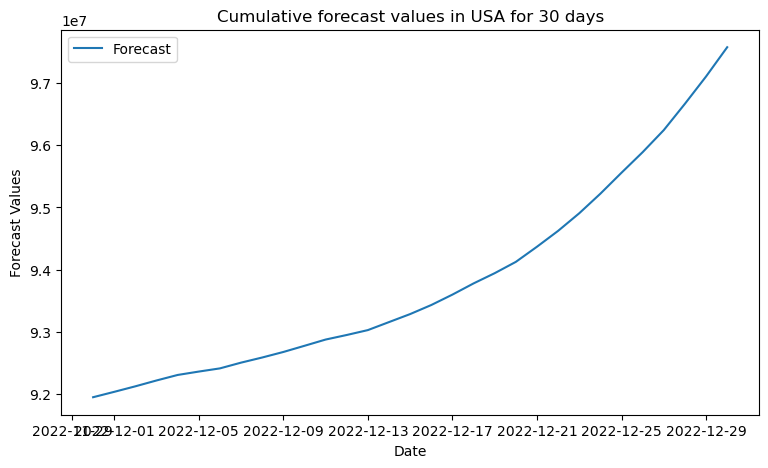

In [62]:
# Create a plot to visualize the forecast values
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(forecast_dates['ds'], forecast['yhat'], label='Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("Forecast Values")
ax.set(title = "Cumulative forecast values in USA for 30 days")
ax.legend()
plt.show()